In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data preprocessing
X_train = train.drop(columns=['smoking'])  # Exclude the target variable
y_train = train['smoking']

X_test = test  # No need to drop 'smoking' column for test data

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training using Logistic Regression
logistic_model = LogisticRegression()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation to evaluate the model
y_pred_train = cross_val_predict(logistic_model, X_train_scaled, y_train, cv=cv)  # Predict on training data
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Classification Report on Training Data:")
print(f"Accuracy on Training Data: {accuracy_train}")

# Train the final model on the entire training dataset
logistic_model.fit(X_train_scaled, y_train)

# Predict smoking probabilities on the test data
y_pred_proba_test = logistic_model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1

# Save predictions to a CSV file for test data
submission = test[['id']].copy()
submission['smoking'] = y_pred_proba_test
submission.to_csv('Yaga\'s_submission.csv', index=False)


Classification Report on Training Data:
Accuracy on Training Data: 0.748587180388808


In [ ]:
#hada 0.78 private but takes time


import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data preprocessing
X_train = train.drop(columns=['smoking'])  # Exclude the target variable
y_train = train['smoking']

X_test = test.drop(columns=['smoking'], errors='ignore')  # In case 'smoking' column is present

# Handling missing values
imputer = SimpleImputer(strategy='mean')  # or median, most_frequent
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training using Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation to evaluate the model
y_pred_train = cross_val_predict(random_forest_model, X_train_scaled, y_train, cv=cv)  # Predict on training data
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy on Training Data: {accuracy_train}")

# Train the final model on the entire training dataset
random_forest_model.fit(X_train_scaled, y_train)

# Predict smoking probabilities on the test data
y_pred_proba_test = random_forest_model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1

# Save predictions to a CSV file for test data
submission = pd.DataFrame({'id': test['id'], 'smoking': y_pred_proba_test})
submission.to_csv('Yagas_submission.csv', index=False)


In [2]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data preprocessing
X_train = train.drop(columns=['smoking'])  # Exclude the target variable
y_train = train['smoking']

X_test = test  # No need to drop 'smoking' column for test data

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training using Logistic Regression with increased max_iter
logistic_model = LogisticRegression(max_iter=1000)  # Increased max_iter

# Hyperparameter Tuning
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga']
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(logistic_model, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best Model
best_model = grid_search.best_estimator_

# Cross-validation to evaluate the model
y_pred_train = cross_val_predict(best_model, X_train_scaled, y_train, cv=cv)  # Predict on training data
accuracy_train = accuracy_score(y_train, y_pred_train)
roc_auc_train = roc_auc_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)

print("Classification Report on Training Data:")
print(f"Accuracy: {accuracy_train}")
print(f"ROC AUC: {roc_auc_train}")
print(f"F1 Score: {f1_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")

# Train the final model on the entire training dataset
best_model.fit(X_train_scaled, y_train)

# Predict smoking probabilities on the test data
y_pred_proba_test = best_model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1

# Save predictions to a CSV file for test data
submission = test[['id']].copy()
submission['smoking'] = y_pred_proba_test
submission.to_csv('Yaga\'s_submission1.csv', index=False)


Classification Report on Training Data:
Accuracy: 0.7486185763801678
ROC AUC: 0.747059415162687
F1 Score: 0.7188031186345439
Precision: 0.7036593918891043
Recall: 0.734613010207744


In [5]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data preprocessing
X_train = train.drop(columns=['smoking'])  # Exclude the target variable
y_train = train['smoking']
X_test = test

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training using a more efficient Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='sqrt', random_state=42)

# Efficient cross-validation strategy
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Cross-validation to evaluate the model
y_pred_train_rf = cross_val_predict(rf_model, X_train_scaled, y_train, cv=cv)
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)

print("Random Forest Classification Report on Training Data:")
print(f"Accuracy on Training Data: {accuracy_train_rf}")

# Train the final model on the entire training dataset
rf_model.fit(X_train_scaled, y_train)

# Predict smoking probabilities on the test data
y_pred_proba_test_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Save predictions to a CSV file for test data
submission_rf = test[['id']].copy()
submission_rf['smoking'] = y_pred_proba_test_rf
submission_rf.to_csv('Efficient_RF_Yaga\'s_submission.csv', index=False)


Random Forest Classification Report on Training Data:
Accuracy on Training Data: 0.768630381272919


In [6]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data preprocessing
X_train = train.drop(columns=['smoking'])  # Exclude the target variable
y_train = train['smoking']
X_test = test

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training using Logistic Regression with parameter tuning
logistic_model = LogisticRegression(C=0.5, penalty='l2', solver='liblinear', random_state=42)

# Cross-validation strategy
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Cross-validation to evaluate the model
y_pred_train = cross_val_predict(logistic_model, X_train_scaled, y_train, cv=cv)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Logistic Regression Classification Report on Training Data:")
print(f"Accuracy on Training Data: {accuracy_train}")

# Train the final model on the entire training dataset
logistic_model.fit(X_train_scaled, y_train)

# Predict smoking probabilities on the test data
y_pred_proba_test = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Save predictions to a CSV file for test data
submission = test[['id']].copy()
submission['smoking'] = y_pred_proba_test
submission.to_csv('Logistic_Yaga\'s_submission.csv', index=False)


Logistic Regression Classification Report on Training Data:
Accuracy on Training Data: 0.7485055508112725


In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data preprocessing
X_train = train.drop(columns=['smoking'])
y_train = train['smoking']
X_test = test

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training using XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Cross-validation strategy
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Cross-validation to evaluate the model
y_pred_train_xgb = cross_val_predict(xgb_model, X_train_scaled, y_train, cv=cv)
accuracy_train_xgb = accuracy_score(y_train, y_pred_train_xgb)

print("XGBoost Classification Report on Training Data:")
print(f"Accuracy on Training Data: {accuracy_train_xgb}")

# Train the final model on the entire training dataset
xgb_model.fit(X_train_scaled, y_train)

# Predict smoking probabilities on the test data
y_pred_proba_test_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Save predictions to a CSV file for test data
submission_xgb = test[['id']].copy()
submission_xgb['smoking'] = y_pred_proba_test_xgb
submission_xgb.to_csv('XGBoost_Yaga\'sTest_submission.csv', index=False)


c:\Users\houss\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\houss\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Classification Report on Training Data:
Accuracy on Training Data: 0.7783003466117446


In [2]:

#best pub scoer for now

import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data preprocessing
X_train = train.drop(columns=['smoking'])  # Exclude the target variable
y_train = train['smoking']
X_test = test

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training using XGBoost Classifier
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Cross-validation strategy
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Cross-validation to evaluate the model
y_pred_train_xgb = cross_val_predict(xgb_model, X_train_scaled, y_train, cv=cv)
accuracy_train_xgb = accuracy_score(y_train, y_pred_train_xgb)

print("XGBoost Classification Report on Training Data:")
print(f"Accuracy on Training Data: {accuracy_train_xgb}")

# Train the final model on the entire training dataset
xgb_model.fit(X_train_scaled, y_train)

# Predict smoking probabilities on the test data
y_pred_proba_test_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Save predictions to a CSV file for test data
submission_xgb = test[['id']].copy()
submission_xgb['smoking'] = y_pred_proba_test_xgb
submission_xgb.to_csv('XGB2.0_Yaga\'s_submission.csv', index=False)


XGBoost Classification Report on Training Data:
Accuracy on Training Data: 0.7783003466117446


In [11]:
import pandas as pd
import warnings
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Suppress specific warnings
warnings.filterwarnings('ignore', category=UserWarning, module='joblib')

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data preprocessing
X_train = train.drop(columns=['smoking'])  # Exclude the target variable
y_train = train['smoking']
X_test = test

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training using LightGBM Classifier with suppressed logs
lgbm_model = LGBMClassifier(random_state=42, verbose=-1)

# Cross-validation strategy
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Cross-validation to evaluate the model
y_pred_train_lgbm = cross_val_predict(lgbm_model, X_train_scaled, y_train, cv=cv)
accuracy_train_lgbm = accuracy_score(y_train, y_pred_train_lgbm)

print("LightGBM Classification Report on Training Data:")
print(f"Accuracy on Training Data: {accuracy_train_lgbm}")

# Train the final model on the entire training dataset
lgbm_model.fit(X_train_scaled, y_train)

# Predict smoking probabilities on the test data
y_pred_proba_test_lgbm = lgbm_model.predict_proba(X_test_scaled)[:, 1]

# Save predictions to a CSV file for test data
submission_lgbm = test[['id']].copy()
submission_lgbm['smoking'] = y_pred_proba_test_lgbm
submission_lgbm.to_csv('LGBM_Yaga\'s_submission.csv', index=False)


LightGBM Classification Report on Training Data:
Accuracy on Training Data: 0.7807555131360828


In [13]:
import pandas as pd
import warnings
from sklearn.model_selection import StratifiedKFold, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Suppress specific warnings
warnings.filterwarnings('ignore', category=UserWarning, module='joblib')

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data preprocessing
X_train = train.drop(columns=['smoking'])  # Exclude the target variable
y_train = train['smoking']
X_test = test

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LightGBM Classifier with suppressed logs and forced column-wise computation
lgbm_model = LGBMClassifier(random_state=42, verbose=-1, force_col_wise=True)

# Hyperparameter grid
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

# Grid search with cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(lgbm_model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model
best_lgbm_model = grid_search.best_estimator_

# Evaluate the model
y_pred_train_lgbm = cross_val_predict(best_lgbm_model, X_train_scaled, y_train, cv=cv)
accuracy_train_lgbm = accuracy_score(y_train, y_pred_train_lgbm)

print("LightGBM Classification Report on Training Data:")
print(f"Accuracy on Training Data: {accuracy_train_lgbm}")

# Train the final model on the entire training dataset
best_lgbm_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_proba_test_lgbm = best_lgbm_model.predict_proba(X_test_scaled)[:, 1]

# Save predictions to a CSV file for test data
submission_lgbm = test[['id']].copy()
submission_lgbm['smoking'] = y_pred_proba_test_lgbm
submission_lgbm.to_csv('Optimized_LGBM_Yaga\'s_submission.csv', index=False)


LightGBM Classification Report on Training Data:
Accuracy on Training Data: 0.7829029989450947


In [14]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint, uniform

# Load and preprocess data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
X_train = train.drop(columns=['smoking'])
y_train = train['smoking']
X_test = test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LightGBM with extended hyperparameter tuning
lgbm_model = LGBMClassifier(random_state=42, verbose=-1, force_col_wise=True)

# Define a search space for hyperparameters
param_distributions = {
    'num_leaves': randint(20, 60),
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(100, 500),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0.0, 1.0),
    'reg_lambda': uniform(0.0, 1.0)
}

# Random search with cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(lgbm_model, param_distributions, n_iter=100, cv=cv, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_scaled, y_train)

# Best model
best_lgbm_model = random_search.best_estimator_

# Model evaluation
y_pred_train_lgbm = cross_val_predict(best_lgbm_model, X_train_scaled, y_train, cv=cv)
accuracy_train_lgbm = accuracy_score(y_train, y_pred_train_lgbm)
print("LightGBM Classification Report on Training Data:")
print(f"Accuracy on Training Data: {accuracy_train_lgbm}")

# Train the final model and predict
best_lgbm_model.fit(X_train_scaled, y_train)
y_pred_proba_test_lgbm = best_lgbm_model.predict_proba(X_test_scaled)[:, 1]

# Save predictions
submission_lgbm = test[['id']].copy()
submission_lgbm['smoking'] = y_pred_proba_test_lgbm
submission_lgbm.to_csv('Enhanced_LGBM_Yaga\'s_submission.csv', index=False)

#hada 0.1 changed

LightGBM Classification Report on Training Data:
Accuracy on Training Data: 0.7840081378409605


In [15]:
import pandas as pd
import warnings
from sklearn.model_selection import StratifiedKFold, cross_val_predict, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint, uniform

# Suppress specific warnings
warnings.filterwarnings('ignore', category=UserWarning, module='joblib')

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data preprocessing
X_train = train.drop(columns=['smoking'])  # Exclude the target variable
y_train = train['smoking']
X_test = test

# Feature Engineering (Placeholder - adapt based on your dataset and domain knowledge)
# Example: X_train['new_feature'] = X_train['feature1'] / X_train['feature2']

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LightGBM Classifier with extended hyperparameter tuning
lgbm_model = LGBMClassifier(random_state=42, verbose=-1, force_col_wise=True)

# Define a search space for hyperparameters
param_distributions = {
    'num_leaves': randint(20, 60),
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(100, 500),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0.0, 1.0),
    'reg_lambda': uniform(0.0, 1.0)
}

# Random search with cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(lgbm_model, param_distributions, n_iter=100, cv=cv, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_scaled, y_train)

# Best model from random search
best_lgbm_model = random_search.best_estimator_

# Adjusting model complexity (Example - adjust as needed)
best_lgbm_model.set_params(max_depth=8, min_child_samples=20)

# Re-train the model with the updated complexity
best_lgbm_model.fit(X_train_scaled, y_train)

# Re-evaluate the model
y_pred_train_lgbm = cross_val_predict(best_lgbm_model, X_train_scaled, y_train, cv=cv)
accuracy_train_lgbm = accuracy_score(y_train, y_pred_train_lgbm)
print("Updated LightGBM Classification Report on Training Data:")
print(f"Accuracy on Training Data: {accuracy_train_lgbm}")

# Predict on the test data
y_pred_proba_test_lgbm = best_lgbm_model.predict_proba(X_test_scaled)[:, 1]

# Save predictions to a CSV file for test data
submission_lgbm = test[['id']].copy()
submission_lgbm['smoking'] = y_pred_proba_test_lgbm
submission_lgbm.to_csv('Enhanced_LGBM_Yaga\'s_submission.csv', index=False)


#Best Public Score (last day subs) !!!


Updated LightGBM Classification Report on Training Data:
Accuracy on Training Data: 0.7845293112975336


In [18]:
import pandas as pd
import warnings
from sklearn.model_selection import StratifiedKFold, cross_val_predict, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import randint, uniform
import numpy as np

# Suppress specific warnings
warnings.filterwarnings('ignore', category=UserWarning, module='joblib')

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data preprocessing
X_train = train.drop(columns=['smoking'])  # Exclude the target variable
y_train = train['smoking']
X_test = test

# Feature Engineering (Placeholder - adapt based on your dataset and domain knowledge)
# Example: X_train['new_feature'] = X_train['feature1'] / X_train['feature2']

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LightGBM Classifier with extended hyperparameter tuning
lgbm_model = LGBMClassifier(random_state=42, verbose=-1, force_col_wise=True)

# Define a search space for hyperparameters
param_distributions = {
    'num_leaves': randint(20, 100),  # Increased range
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(200, 1000),  # Increased range
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0.0, 1.0),
    'reg_lambda': uniform(0.0, 1.0)
}

# Random search with cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Increased number of splits
random_search = RandomizedSearchCV(lgbm_model, param_distributions, n_iter=100, cv=cv, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_scaled, y_train)

# Best model from random search
best_lgbm_model = random_search.best_estimator_

# Re-train the model with the updated complexity
best_lgbm_model.fit(X_train_scaled, y_train)

# Re-evaluate the model
y_pred_train_lgbm = cross_val_predict(best_lgbm_model, X_train_scaled, y_train, cv=cv)
accuracy_train_lgbm = accuracy_score(y_train, y_pred_train_lgbm)
print("Updated LightGBM Classification Report on Training Data:")
print(f"Accuracy on Training Data: {accuracy_train_lgbm}")
print(classification_report(y_train, y_pred_train_lgbm))
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train_lgbm))

# Predict on the test data
y_pred_test_lgbm = best_lgbm_model.predict(X_test_scaled)

# Save predictions to a CSV file for test data
submission_lgbm = test[['id']].copy()
submission_lgbm['smoking'] = y_pred_test_lgbm
submission_lgbm.to_csv('Yaga2.0\'s_submission.csv', index=False)


Updated LightGBM Classification Report on Training Data:
Accuracy on Training Data: 0.7854209574521525
              precision    recall  f1-score   support

           0       0.84      0.76      0.80     89603
           1       0.73      0.81      0.77     69653

    accuracy                           0.79    159256
   macro avg       0.78      0.79      0.78    159256
weighted avg       0.79      0.79      0.79    159256

Confusion Matrix:
[[68498 21105]
 [13068 56585]]


In [23]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data preprocessing
X_train = train.drop(columns=['smoking'])  # Exclude the target variable
y_train = train['smoking']
X_test = test

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.15],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

grid_search = GridSearchCV(XGBClassifier(eval_metric='logloss', random_state=42), param_grid, cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42), scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Train the final model with the best parameters
xgb_model = XGBClassifier(**best_params, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict smoking probabilities on the test data
y_pred_proba_test_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Save predictions to a CSV file for test data
submission_xgb = test[['id']].copy()
submission_xgb['smoking'] = y_pred_proba_test_xgb
submission_xgb.to_csv('XGB2.1_Yaga\'s_submission.csv', index=False)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best Accuracy: 0.7836690502350644


In [25]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data preprocessing
X_train = train.drop(columns=['smoking'])  # Exclude the target variable
y_train = train['smoking']
X_test = test

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training using XGBoost Classifier with hyperparameter tuning
xgb_model = XGBClassifier(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Cross-validation strategy
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(xgb_model, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best model from the grid search
best_xgb_model = grid_search.best_estimator_

# Cross-validation to evaluate the model
y_pred_train_xgb = cross_val_predict(best_xgb_model, X_train_scaled, y_train, cv=cv)
accuracy_train_xgb = accuracy_score(y_train, y_pred_train_xgb)

print("XGBoost Classification Report on Training Data:")
print(f"Accuracy on Training Data: {accuracy_train_xgb}")

# Train the final model on the entire training dataset using the best hyperparameters
best_xgb_model.fit(X_train_scaled, y_train)

# Predict smoking probabilities on the test data
y_pred_proba_test_xgb = best_xgb_model.predict_proba(X_test_scaled)[:, 1]

# Save predictions to a CSV file for test data
submission_xgb = test[['id']].copy()
submission_xgb['smoking'] = y_pred_proba_test_xgb
submission_xgb.to_csv('XGB2.2_Yaga\'s_submission.csv', index=False) 

XGBoost Classification Report on Training Data:
Accuracy on Training Data: 0.7825702014366805


In [6]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFECV

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Feature Engineering (example: BMI)
train['bmi'] = train['weight(kg)'] / (train['height(cm)'] / 100) ** 2
test['bmi'] = test['weight(kg)'] / (test['height(cm)'] / 100) ** 2

# Data preprocessing
X_train = train.drop(columns=['smoking', 'id'])  # Exclude the target variable and 'id'
y_train = train['smoking']
X_test = test.drop(columns=['id'])  # Assuming 'id' is not a feature

# Ensure X_train and X_test have the same columns
assert X_train.columns.equals(X_test.columns), "Columns of X_train and X_test do not match"

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Model training using XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)

# Feature Selection
selector = RFECV(xgb_model, step=1, cv=3)
X_train_selected = selector.fit_transform(X_train_balanced, y_train_balanced)

# Hyperparameter tuning
param_dist = {
    'learning_rate': [0.1, 0.01, 0.05],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [100, 200, 300, 400],
    'subsample': [0.7, 0.8, 0.9]
}

random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=50, scoring='roc_auc', cv=3, random_state=42)
random_search.fit(X_train_selected, y_train_balanced)

# Best model
best_xgb_model = random_search.best_estimator_

# Evaluation
y_pred_train = cross_val_predict(best_xgb_model, X_train_selected, y_train_balanced, cv=3)
accuracy = accuracy_score(y_train_balanced, y_pred_train)
precision = precision_score(y_train_balanced, y_pred_train)
recall = recall_score(y_train_balanced, y_pred_train)
f1 = f1_score(y_train_balanced, y_pred_train)
roc_auc = roc_auc_score(y_train_balanced, y_pred_train)

print("XGBoost Classification Report on Training Data:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

# Predictions on test data
X_test_selected = selector.transform(X_test_scaled)
y_pred_proba_test = best_xgb_model.predict_proba(X_test_selected)[:, 1]

# Save predictions to a CSV file for test data
submission = test[['id']].copy()
submission['smoking_probability'] = y_pred_proba_test
submission.to_csv('XGB2.2_Enhanced_Submission.csv', index=False)


# version 2 of 0.87 but runtime over 


XGBoost Classification Report on Training Data:
Accuracy: 0.7880428110665938
Precision: 0.773067278902208
Recall: 0.815463767954198
F1 Score: 0.7936997610254183
ROC-AUC: 0.7880428110665937


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import numpy as np

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data preprocessing
X = train.drop(columns=['smoking'])  # Features
y = train['smoking']  # Target variable

# Feature engineering
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(poly.transform(test))

# Model 1: XGBoost with cross-validation
xgb_model = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=200, random_state=42)
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
xgb_cv_scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
print("XGBoost Cross-Validation Accuracy: %0.4f (+/- %0.4f)" % (xgb_cv_scores.mean(), xgb_cv_scores.std() * 2))

# Model 2: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
print("Random Forest Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (rf_cv_scores.mean(), rf_cv_scores.std() * 2))

# Model Ensembling: Voting Classifier
voting_clf = VotingClassifier(estimators=[('xgb', xgb_model), ('rf', rf_model)], voting='soft')
voting_clf.fit(X_train_scaled, y_train)
ensemble_accuracy = voting_clf.score(X_val_scaled, y_val)
print("Ensemble Model Accuracy on Validation Data:", ensemble_accuracy)

# Final predictions on the test data using the ensemble model
y_pred_test = voting_clf.predict(X_test_scaled)

# Save predictions to a CSV file for test data
submission = test[['id']].copy()
submission['smoking'] = y_pred_test
submission.to_csv('ensemble_model_submission.csv', index=False)

XGBoost Cross-Validation Accuracy: 0.78 (+/- 0.00)
Random Forest Cross-Validation Accuracy: 0.77 (+/- 0.00)
Ensemble Model Accuracy on Validation Data: 0.7764661559713676


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score
from xgboost import XGBClassifier
import optuna
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Feature Engineering (example: BMI)
train['bmi'] = train['weight(kg)'] / (train['height(cm)'] / 100) ** 2
test['bmi'] = test['weight(kg)'] / (test['height(cm)'] / 100) ** 2

# Data preprocessing
X_train = train.drop(columns=['smoking', 'id'])  # Exclude the target variable and 'id'
y_train = train['smoking']
X_test = test.drop(columns=['id'])  # Assuming 'id' is not a feature

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Define the Optuna objective function
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 400),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
    }

    model = XGBClassifier(**param)

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    roc_auc_scores = []
    for train_index, val_index in kf.split(X_train_balanced, y_train_balanced):
        X_train_kf, X_val_kf = X_train_balanced[train_index], X_train_balanced[val_index]
        y_train_kf, y_val_kf = y_train_balanced[train_index], y_train_balanced[val_index]

        model.fit(X_train_kf, y_train_kf)
        y_pred = model.predict_proba(X_val_kf)[:,1]
        roc_auc_scores.append(roc_auc_score(y_val_kf, y_pred))

    return np.mean(roc_auc_scores)

# Optuna optimization with 10 trials
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=60)

# Best model
best_params = study.best_params
model = XGBClassifier(**best_params)
model.fit(X_train_balanced, y_train_balanced)

# Accuracy on the training data
y_pred_train = model.predict(X_train_balanced)
accuracy_train = accuracy_score(y_train_balanced, y_pred_train)
print(f"Accuracy on Training Data: {accuracy_train}")

# Predictions on test data
y_pred_proba_test = model.predict_proba(X_test_scaled)[:, 1]

# Save predictions to a CSV file for test data
submission = test[['id']].copy()
submission['smoking_probability'] = y_pred_proba_test
submission.to_csv('XGB_Optuna_Enhanced_Submission.csv', index=False)


[I 2024-01-02 16:49:35,593] A new study created in memory with name: no-name-c00058e2-4bd2-46d8-be51-1c2b888b4939
[I 2024-01-02 16:51:15,186] Trial 0 finished with value: 0.8952745248781364 and parameters: {'n_estimators': 224, 'max_depth': 7, 'learning_rate': 0.08503465697761481, 'subsample': 0.9523206618913249}. Best is trial 0 with value: 0.8952745248781364.
[I 2024-01-02 16:51:56,923] Trial 1 finished with value: 0.8683512154327626 and parameters: {'n_estimators': 133, 'max_depth': 5, 'learning_rate': 0.023010350610988533, 'subsample': 0.8340226746450462}. Best is trial 0 with value: 0.8952745248781364.
[I 2024-01-02 16:54:46,043] Trial 2 finished with value: 0.8931251235392723 and parameters: {'n_estimators': 332, 'max_depth': 8, 'learning_rate': 0.03051641826821396, 'subsample': 0.9706018476942448}. Best is trial 0 with value: 0.8952745248781364.
[I 2024-01-02 16:55:54,878] Trial 3 finished with value: 0.8768769197814285 and parameters: {'n_estimators': 126, 'max_depth': 8, 'lear

Accuracy on Training Data: 0.8836199680814258


So lets try to merge the Optuna with the best version yet XGB2.2_Enhanced_Submission

In [ ]:
#best XGB version 
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFECV

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Feature Engineering (example: BMI)
train['bmi'] = train['weight(kg)'] / (train['height(cm)'] / 100) ** 2
test['bmi'] = test['weight(kg)'] / (test['height(cm)'] / 100) ** 2

# Data preprocessing
X_train = train.drop(columns=['smoking', 'id'])  # Exclude the target variable and 'id'
y_train = train['smoking']
X_test = test.drop(columns=['id'])  # Assuming 'id' is not a feature

# Ensure X_train and X_test have the same columns
assert X_train.columns.equals(X_test.columns), "Columns of X_train and X_test do not match"

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Model training using XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)

# Feature Selection
selector = RFECV(xgb_model, step=1, cv=3)
X_train_selected = selector.fit_transform(X_train_balanced, y_train_balanced)

# Hyperparameter tuning
param_dist = {
    'learning_rate': [0.1, 0.01, 0.05],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [100, 200, 300, 400],
    'subsample': [0.7, 0.8, 0.9]
}

random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=50, scoring='roc_auc', cv=3, random_state=42)
random_search.fit(X_train_selected, y_train_balanced)

# Best model
best_xgb_model = random_search.best_estimator_

# Evaluation
y_pred_train = cross_val_predict(best_xgb_model, X_train_selected, y_train_balanced, cv=3)
accuracy = accuracy_score(y_train_balanced, y_pred_train)
precision = precision_score(y_train_balanced, y_pred_train)
recall = recall_score(y_train_balanced, y_pred_train)
f1 = f1_score(y_train_balanced, y_pred_train)
roc_auc = roc_auc_score(y_train_balanced, y_pred_train)

# Predictions on test data
X_test_selected = selector.transform(X_test_scaled)
y_pred_proba_test = best_xgb_model.predict_proba(X_test_selected)[:, 1]

# Save predictions to a CSV file for test data
submission = test[['id']].copy()
submission['smoking_probability'] = y_pred_proba_test
submission.to_csv('XGB2.2_Enhanced_Submission.csv', index=False)


# version 2 of 0.87 but runtime over 


In [ ]:
#Best result yet (of the merge) 

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score
from xgboost import XGBClassifier
import optuna
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Feature Engineering (example: BMI)
train['bmi'] = train['weight(kg)'] / (train['height(cm)'] / 100) ** 2
test['bmi'] = test['weight(kg)'] / (test['height(cm)'] / 100) ** 2

# Data preprocessing
X_train = train.drop(columns=['smoking', 'id'])  # Exclude the target variable and 'id'
y_train = train['smoking']
X_test = test.drop(columns=['id'])  # Assuming 'id' is not a feature

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Define the Optuna objective function
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 400),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
    }

    model = XGBClassifier(**param)

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    roc_auc_scores = []
    for train_index, val_index in kf.split(X_train_balanced, y_train_balanced):
        X_train_kf, X_val_kf = X_train_balanced[train_index], X_train_balanced[val_index]
        y_train_kf, y_val_kf = y_train_balanced[train_index], y_train_balanced[val_index]

        model.fit(X_train_kf, y_train_kf)
        y_pred = model.predict_proba(X_val_kf)[:,1]
        roc_auc_scores.append(roc_auc_score(y_val_kf, y_pred))

    return np.mean(roc_auc_scores)

# Optuna optimization with 10 trials
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=60)

# Best model
best_params = study.best_params
model = XGBClassifier(**best_params)
model.fit(X_train_balanced, y_train_balanced)

# Accuracy on the training data
y_pred_train = model.predict(X_train_balanced)
accuracy_train = accuracy_score(y_train_balanced, y_pred_train)
print(f"Accuracy on Training Data: {accuracy_train}")

# Predictions on test data
y_pred_proba_test = model.predict_proba(X_test_scaled)[:, 1]

# Save predictions to a CSV file for test data
submission = test[['id']].copy()
submission['smoking_probability'] = y_pred_proba_test
submission.to_csv('XGB_Optuna_Enhanced_Submission.csv', index=False)


After this only the Best Version (A7ssen score)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
import optuna
from sklearn.preprocessing import StandardScaler

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data preprocessing
X_train = train.drop(columns=['smoking', 'id'])
y_train = train['smoking']
X_test = test.drop(columns=['id'])


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optuna objective
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 400),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
    }

    model = XGBClassifier(**param)

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    roc_auc_scores = []
    for train_index, val_index in kf.split(X_train_balanced, y_train_balanced):
        X_train_kf, X_val_kf = X_train_balanced[train_index], X_train_balanced[val_index]
        y_train_kf, y_val_kf = y_train_balanced[train_index], y_train_balanced[val_index]

        model.fit(X_train_kf, y_train_kf)
        y_pred = model.predict_proba(X_val_kf)[:,1]
        roc_auc_scores.append(roc_auc_score(y_val_kf, y_pred))

    return np.mean(roc_auc_scores)

# Optuna optimization with 10 merat
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Best model
best_params = study.best_params
model = XGBClassifier(**best_params)
model.fit(X_train_balanced, y_train_balanced)

# Predictions on test data
y_pred_proba_test = model.predict_proba(X_test_scaled)[:, 1]

# Save predictions to a CSV file for test data
submission = test[['id']].copy()
submission['smoking_probability'] = y_pred_proba_test
submission.to_csv('XGB_Optuna_Submission.csv', index=False)

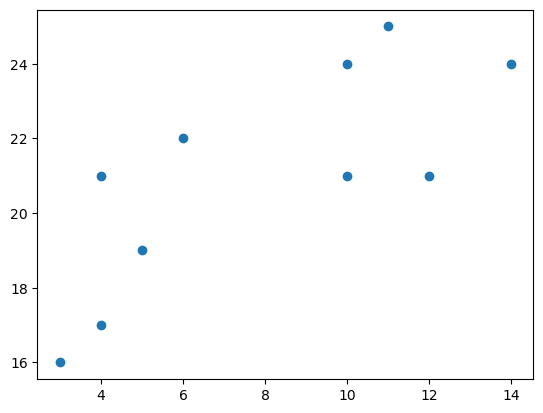

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (6, 22), (10, 21), (12, 21)]


c:\Users\houss\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


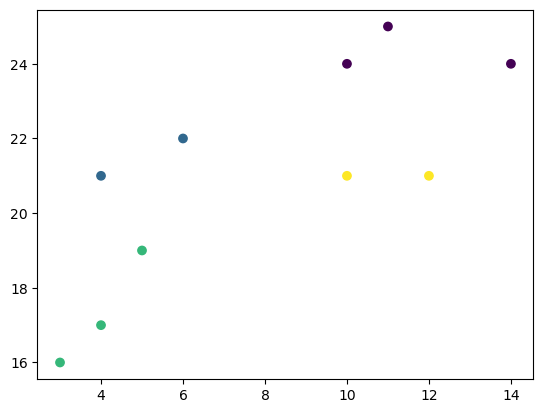

[1]


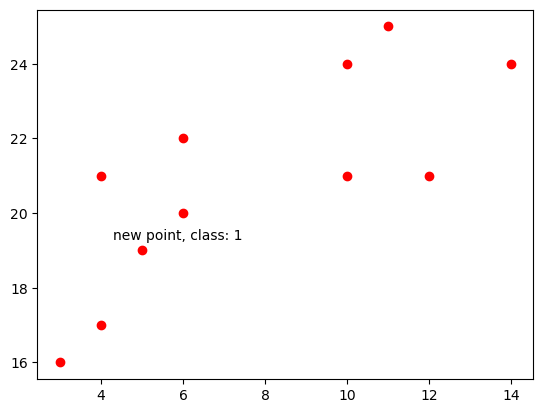

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

x = [4,5,10,4,3,11,14,6,10,12]
y = [21,19,24,17,16,25,24,22,21,21]
plt.scatter(x,y)
plt.show()

data = list(zip(x,y))
print(data)
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(data)

plt.scatter(x,y, c=kmeans.labels_)
plt.show()

new_x = 6
new_y = 20
new_data = [(new_x, new_y)]
prediction = kmeans.predict(new_data)
print(prediction)

plt.scatter(x+[new_x], y+[new_y], color='r')
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

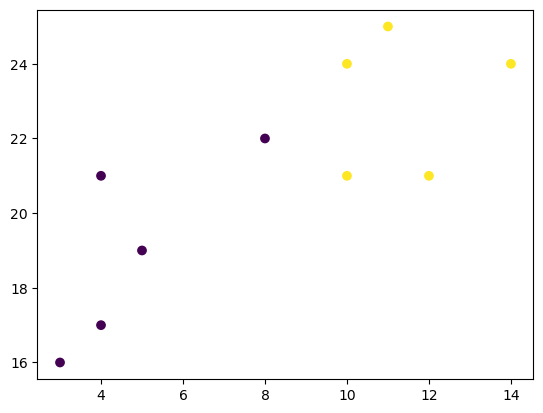

Text(False, 20.3, 'new point, class: 1')

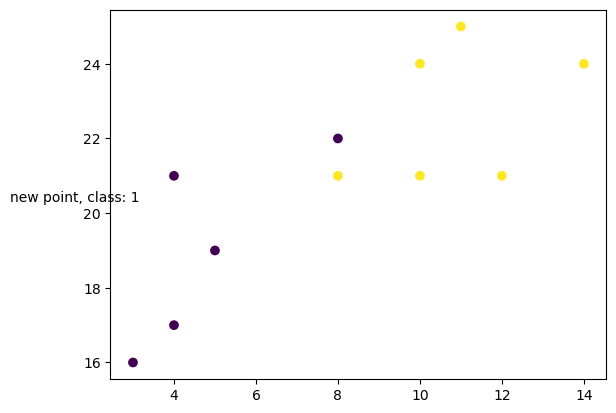

In [2]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

x = [4, 5, 10, 4, 3, 11, 14, 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0,0,1,0,0,1,1,0,1,1]

plt.scatter(x, y, c=classes)
plt.show()

data = list(zip(x, y))

knn = KNeighborsClassifier(n_neighbors=5).fit(data, classes)

new_x = 8
new_y = 21
new_point = [[new_x, new_y]]
prediction = knn.predict(new_point)
plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x==new_x-1.7,y=new_y-0.7,s=f"new point, class: {prediction[0]}")

In [4]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Sample transaction dataset
transactions = [
    ['bread', 'milk', 'butter'],
    ['bread', 'milk'],
    ['bread', 'butter'],
    ['milk', 'butter'],
    ['bread', 'milk', 'butter', 'jam'],
    ['bread', 'milk', 'jam'],
    ['bread', 'butter', 'jam'],
    ['milk', 'jam']
]

# Convert the transaction dataset into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Find frequent itemsets using FP-Growth
frequent_itemsets = fpgrowth(df, min_support=0.3, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Select only confidence and support columns
selected_rules = rules[['antecedents', 'consequents', 'support', 'confidence']]

print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules (Selected Columns):")
print(selected_rules)


Frequent Itemsets:
   support         itemsets
0    0.750           (milk)
1    0.750          (bread)
2    0.625         (butter)
3    0.500            (jam)
4    0.500    (milk, bread)
5    0.500  (butter, bread)
6    0.375   (butter, milk)
7    0.375     (jam, bread)
8    0.375      (milk, jam)

Association Rules:
  antecedents consequents  antecedent support  consequent support  support  \
0    (butter)     (bread)               0.625                0.75    0.500   
1       (jam)     (bread)               0.500                0.75    0.375   
2       (jam)      (milk)               0.500                0.75    0.375   

   confidence      lift  leverage  conviction  zhangs_metric  
0        0.80  1.066667   0.03125        1.25       0.166667  
1        0.75  1.000000   0.00000        1.00       0.000000  
2        0.75  1.000000   0.00000        1.00       0.000000  
